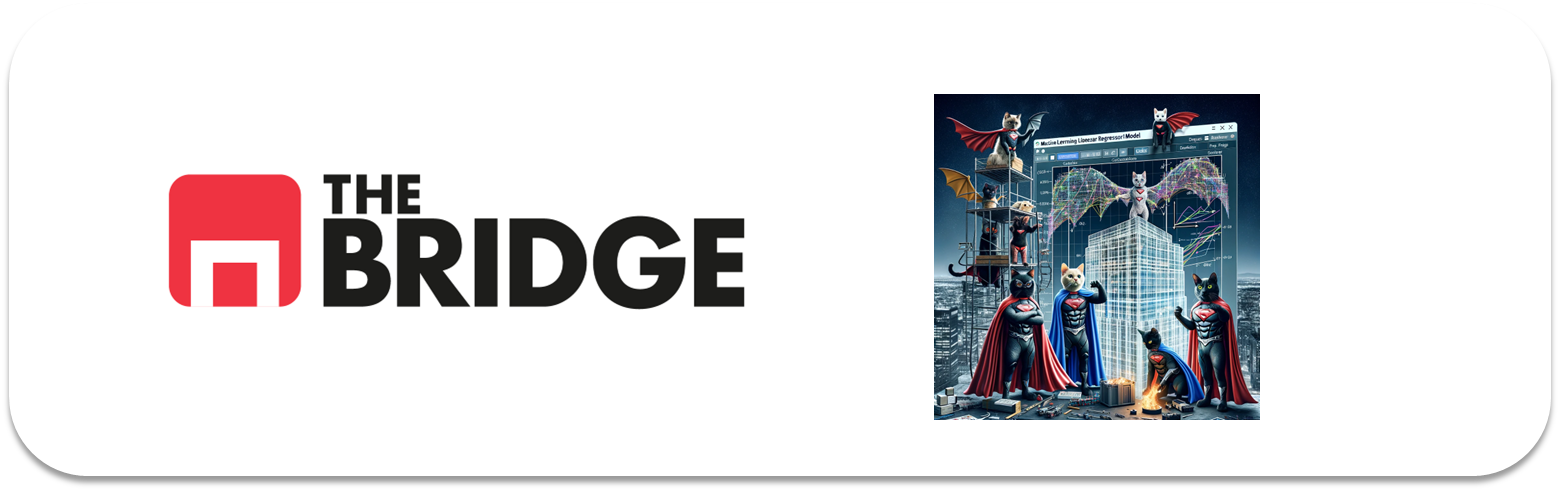

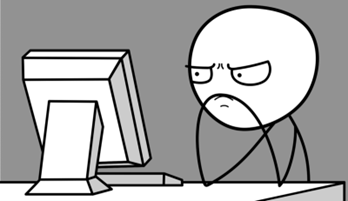

Para ejercitarte y afianzar lo aprendido sobre **Regresión Logistica aplicada a Multiclase**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay



En este conjunto de ejercicios crearás un modelo para resolver un problema multiclase o multicategórico de clasificación, en concreto de clasificación de flores en función de una serie de características de las mismas (otro de esos famosos datasets de aprendizajes, el "iris" dataset)

### Ejercicio 1: Carga de Datos

Cargar el conjunto de datos Iris, que se encuentra dentro del módulo de datasets de `sklearn` (load_iris en sklearn.datasets). Repasa el ejercicio sobre "Diabetes" de la unidad anterior para saber como construir un dataframe de características y una variable con el target.

In [2]:
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

### Ejercicio 2



Muestra la info básica del dataset y sus primeras líneas. ¿Hay variables categóricas? Muestra el target y su distribución.

In [3]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [4]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

*Claramente son posibles features numéricas. Mostramos el target y veamos cómo de equilibrado está*

<Axes: xlabel='target', ylabel='count'>

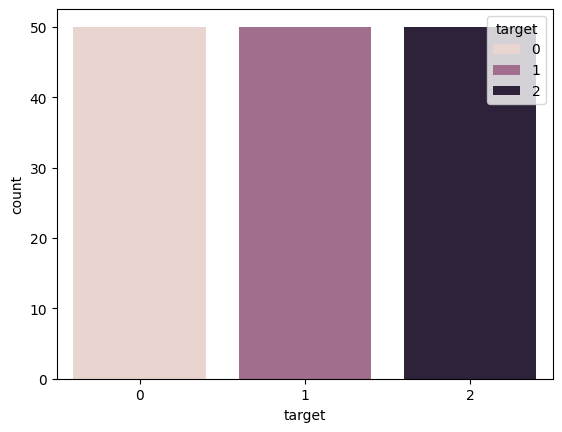

In [5]:
sns.countplot(x= "target", data = iris_df, hue = "target")

*perfectamente balanceado, míralo con cariño que nos los verás así con mucha frecuencia*

### Ejercicio 3: Preparación de Datos

Divide el conjunto de datos en un 80% para entrenamiento y un 20% para pruebas (test). Crea el X_train, X_test, y_train e y_test. Normaliza las características para que tengan una media de 0 y una desviación estándar de 1. ?Qué tipo de escalado habrás hecho?


*Hagamos primero el split*

In [6]:
train_set, test_set = train_test_split(iris_df, test_size= 0.2, random_state= 42)

X_train = train_set.drop("target", axis = 1)
X_test = test_set.drop("target", axis = 1)
y_train = train_set["target"]
y_test = test_set["target"]

*Y ahora escalemos y comprobemos que se cumplen las condiciones de media 0 y desviación estándar 1, recuerda que esto es lo que se llama estandardizar o estandarizar. Lo vamos a ver también en el test pero para que observes el efecto de aplizar el estandarizador ajustado al train y no al test*

In [7]:
# Normalización de las características, observa como el scaler se "ajusta" al train y se aplica así al test. 
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns= X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns= X_test.columns)



In [8]:
X_train_scaled.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count       1.200000e+02      1.200000e+02       1.200000e+02   
mean        1.754152e-15     -1.694940e-15      -2.294461e-16   
std         1.004193e+00      1.004193e+00       1.004193e+00   
min        -1.839628e+00     -2.373778e+00      -1.562535e+00   
25%        -8.644522e-01     -5.850598e-01      -1.276006e+00   
50%        -7.212234e-02     -1.378803e-01       2.998997e-01   
75%         7.202076e-01      7.564785e-01       7.869979e-01   
max         2.304867e+00      2.992376e+00       1.703889e+00   

       petal width (cm)  
count      1.200000e+02  
mean      -2.960595e-17  
std        1.004193e+00  
min       -1.446088e+00  
25%       -1.179118e+00  
50%        1.557325e-01  
75%        8.231577e-01  
max        1.757553e+00

*Fíjate en las medias (mean) cercanas a 0 y en la desviación (std) muy ajustadas a 1*


In [9]:
X_test_scaled.describe()

sepal length (cm)  sepal width (cm)  petal length (cm)  \
count          30.000000         30.000000          30.000000   
mean            0.208241         -0.048444           0.089779   
std             1.030061          0.860167           1.055172   
min            -1.352040         -1.926598          -1.390618   
25%            -0.468287         -0.585060          -1.218701   
50%             0.293568         -0.137880           0.443164   
75%             0.842104          0.309299           0.829977   
max             2.548661          1.650837           1.818500   

       petal width (cm)  
count         30.000000  
mean           0.106788  
std            1.082443  
min           -1.446088  
25%           -1.145747  
50%            0.222475  
75%            1.090128  
max            1.490583

*En cambio en el test, las medias son las que son y la std, no es necesariamente 1 en todas. Es normal, hemos usado los valores de media y desviación estándar originales del dataset de train... Como debe ser, recuerda que el test son siempre datos que simulan los datos nuevos que pueden venirnos en el futuro, por lo tanto no podemos tenerlo para el entrenamiento y no podemos usarlos para escalar*

### Ejercicio 4: Entrenamiento del Modelo de Regresión Logística

Ahora que los datos están listos, es el momento de construir y entrenar tu modelo de regresión logística. Inicializa y entrenar un modelo de regresión logística utilizando el conjunto de entrenamiento (con tan pocos datos no es necesario que ajustes el hiperparámetro "max_iter")


In [10]:

model = LogisticRegression()

model.fit(X_train_scaled, y_train)




LogisticRegression()

### Ejercicio 5: Evaluación del train

Obtén las predicciones para el dataset de train y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

*Primero las predicciones de train*

In [11]:
pred_train = model.predict(X_train_scaled)

*Y ahora las métricas y la matriz de confusión*

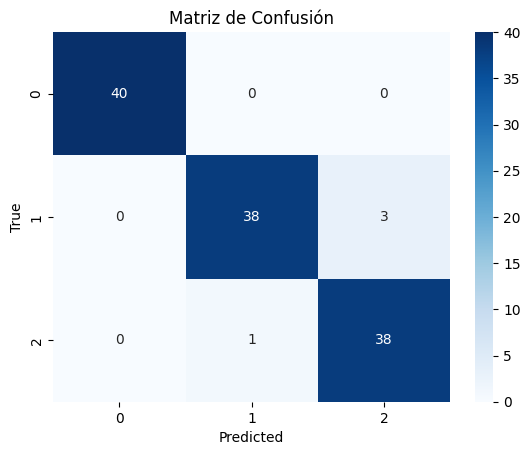

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.93      0.95        41
           2       0.93      0.97      0.95        39

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [12]:
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_train, pred_train)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
report = classification_report(y_train, pred_train)
print(report)


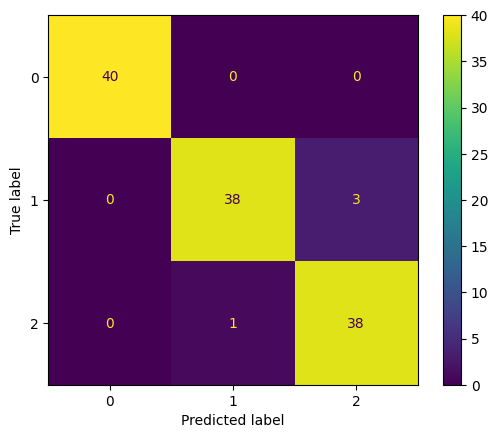

In [13]:
ConfusionMatrixDisplay.from_predictions(y_train,pred_train)

### Ejercicio 6: Evaluación del test

Obtén las predicciones para el dataset de test y luego calcula y muestra la matriz de confusión y genera y muestra un informe de clasificación.

In [14]:
pred_test = model.predict(X_test_scaled)

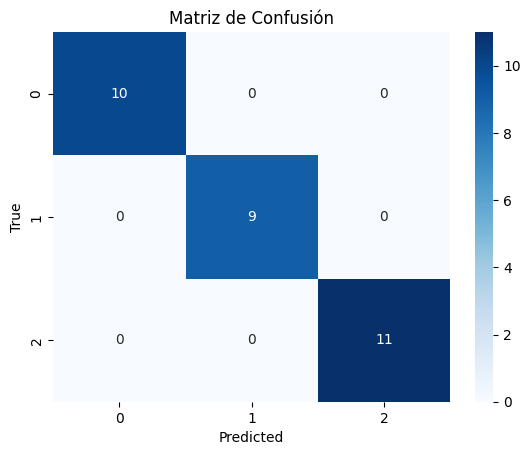

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [15]:
# Calculamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, pred_test)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Generar el informe de clasificación
report = classification_report(y_test, pred_test)
print(report)


### Ejercicio 7: Interpretación de los coeficientes del modelo

Muestra los coeficientes para cada clasificador numéricamente


In [16]:
model.coef_

array([[-1.00316587,  1.14487318, -1.8113482 , -1.69251025],
       [ 0.52799044, -0.28319987, -0.34060665, -0.72013959],
       [ 0.47517543, -0.86167331,  2.15195485,  2.41264984]])

*Son tres arrays porque recuerda que si no le decimos nada LogisticRegression emplea una estrategia one-vs-all o one-vs-rest para acometer los problemas de multiclasificación*

### Ejercicio 8: Interpretación de los coeficientes del modelo (II)

Modifica la siguiente función y pinta los coeficientes obtenidos en el ejercicio anterior:

```python
def show_coefs(model, figsize=(10, 5)):
    df_coef = pd.DataFrame(model.coef_[0], index=model.feature_names_in_, columns=["coefs"])

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle("Model Coefficients")

    fig.tight_layout()

    return df_coef
```

*Hay que pedirle que pinte las gráficas para cada uno de los modelos, lo podemos hacer dentro o fuera de la función...*

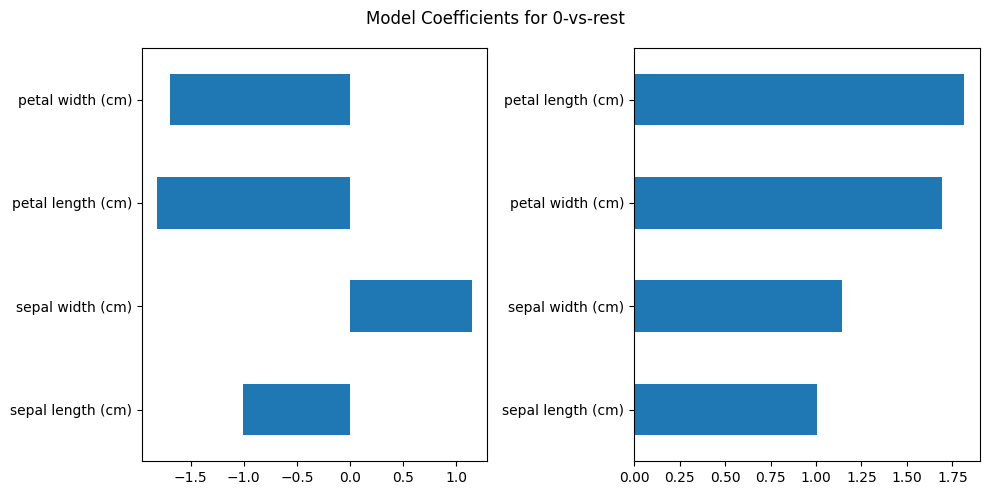

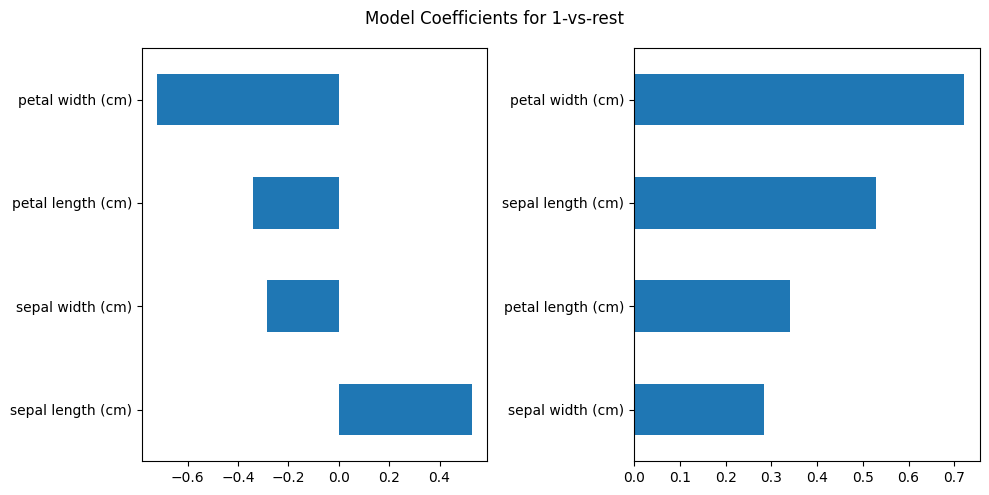

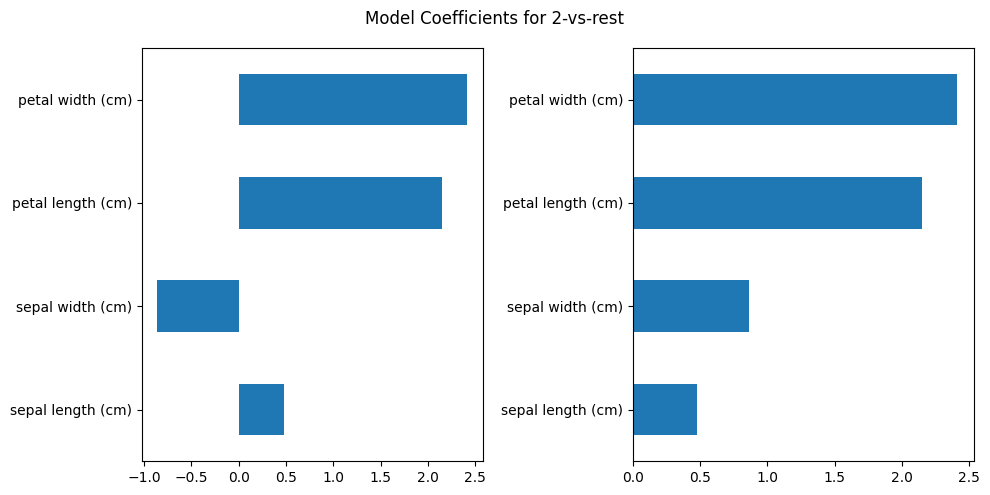

In [17]:
# Por fuera
# Las gráficas de la derecha son los mismos coeficientes en valor absoluto

def show_coefs(model, figsize=(10, 5), model_index = 0): # Metemos el índice para indicar que modelo pintar
    df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["coefs"]) # El indice dice que juego de coeficientes considerar

    fig, ax = plt.subplots(1, 2, figsize=figsize)
    df_coef.plot(kind="barh", ax=ax[0], legend=False)
    df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
    fig.suptitle(f"Model Coefficients for {model_index}-vs-rest") # Cambiamos la leyenda para ver qué modelo está presentando

    fig.tight_layout()

    return df_coef

for model_index in range(3): # Para cada modelo aplicamos la función
    show_coefs(model, model_index = model_index)

*Ahora haciendo que se encargue la función de todo*

[                      coefs
 sepal length (cm) -1.003166
 sepal width (cm)   1.144873
 petal length (cm) -1.811348
 petal width (cm)  -1.692510,
                       coefs
 sepal length (cm)  0.527990
 sepal width (cm)  -0.283200
 petal length (cm) -0.340607
 petal width (cm)  -0.720140,
                       coefs
 sepal length (cm)  0.475175
 sepal width (cm)  -0.861673
 petal length (cm)  2.151955
 petal width (cm)   2.412650]

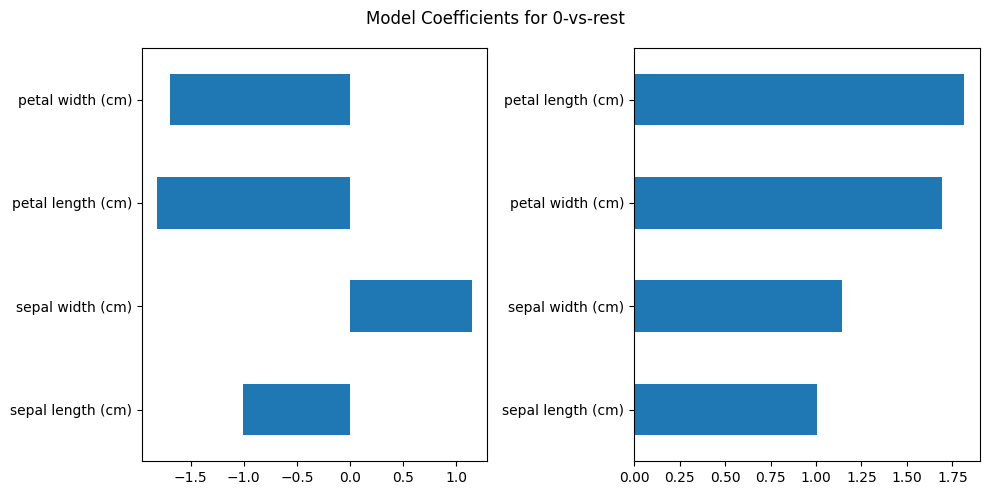

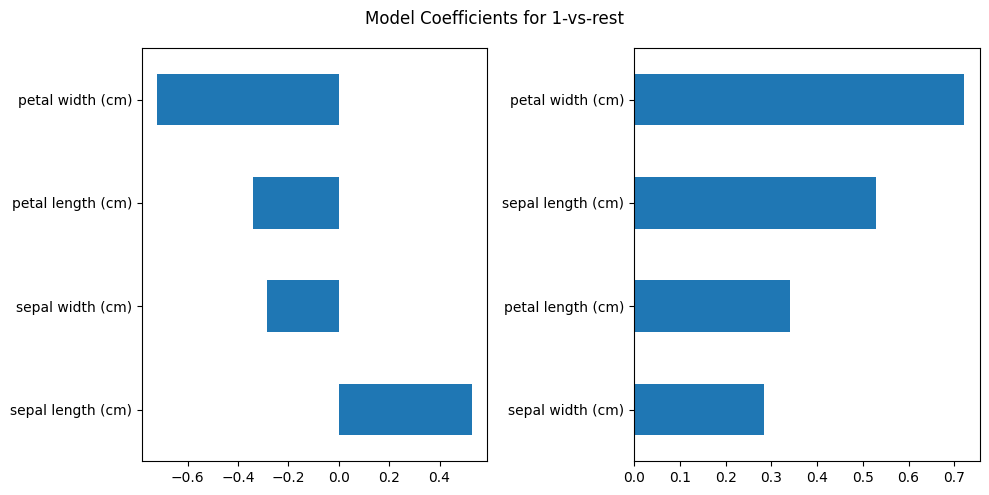

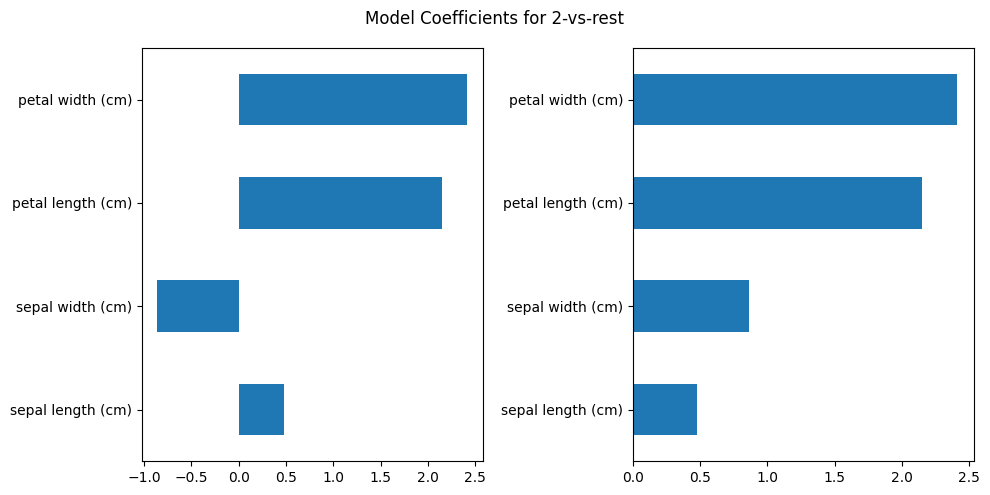

In [18]:
def show_coefs(model, figsize=(10, 5)): 
    number_of_submodels = model.coef_.shape[0] # Obtenemos el número de submodelos, ya que coef_ devuelve un array de dimensión 2 (ndim de numpy ojo) y la cardinalidad de la primera da el numero de modelos o sea el número de clases
    # number_of_submodels = len(model.classes_), sería una opción alternativa.
    list_of_dfs = []
    for model_index in range(number_of_submodels):
        df_coef = pd.DataFrame(model.coef_[model_index], index=model.feature_names_in_, columns=["coefs"]) # El indice dice que juego de coeficientes considerar

        fig, ax = plt.subplots(1, 2, figsize=figsize)
        df_coef.plot(kind="barh", ax=ax[0], legend=False)
        df_coef.abs().sort_values(by="coefs").plot(kind="barh", ax=ax[1], legend=False)
        fig.suptitle(f"Model Coefficients for {model_index}-vs-rest") # Cambiamos la leyenda para ver qué modelo está presentando

        fig.tight_layout()
        list_of_dfs.append(df_coef.copy())

    return list_of_dfs

show_coefs(model)